In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [17]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

In [28]:
# Assuming that zeros in the following columns represent missing values
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [19]:
# Replace zeros with NaN
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

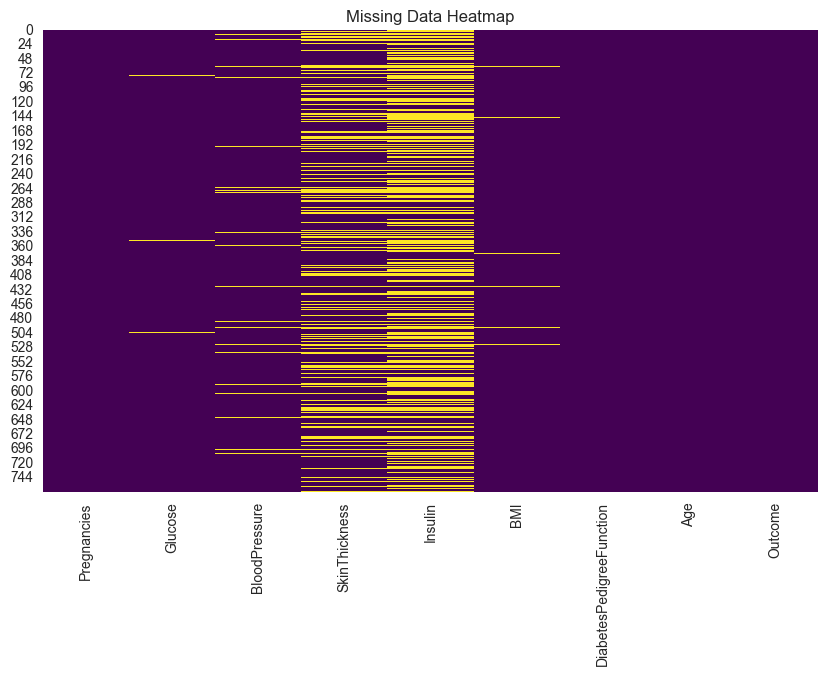

In [20]:
# Visualizing missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


In [21]:
# Exploratory data analysis to understand the data before imputation
# For example, we could examine the mean and median of the columns
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
# Check for missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [23]:
# Using the MICE imputer within a pipeline that also includes scaling
imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5), max_iter=10, random_state=0)
pipeline = Pipeline([
    ('scale', MinMaxScaler()),  # Scale data to improve KNN performance
    ('impute', imputer)         # Impute missing values using KNN
])

In [24]:
# Fit the pipeline and transform the data (imputation is applied after scaling)
df[columns_with_zeros] = pipeline.fit_transform(df[columns_with_zeros])

C:\Users\Rxque\PycharmProjects\tensorflow_training\venv\lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [25]:
# Check if the missing values are filled
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

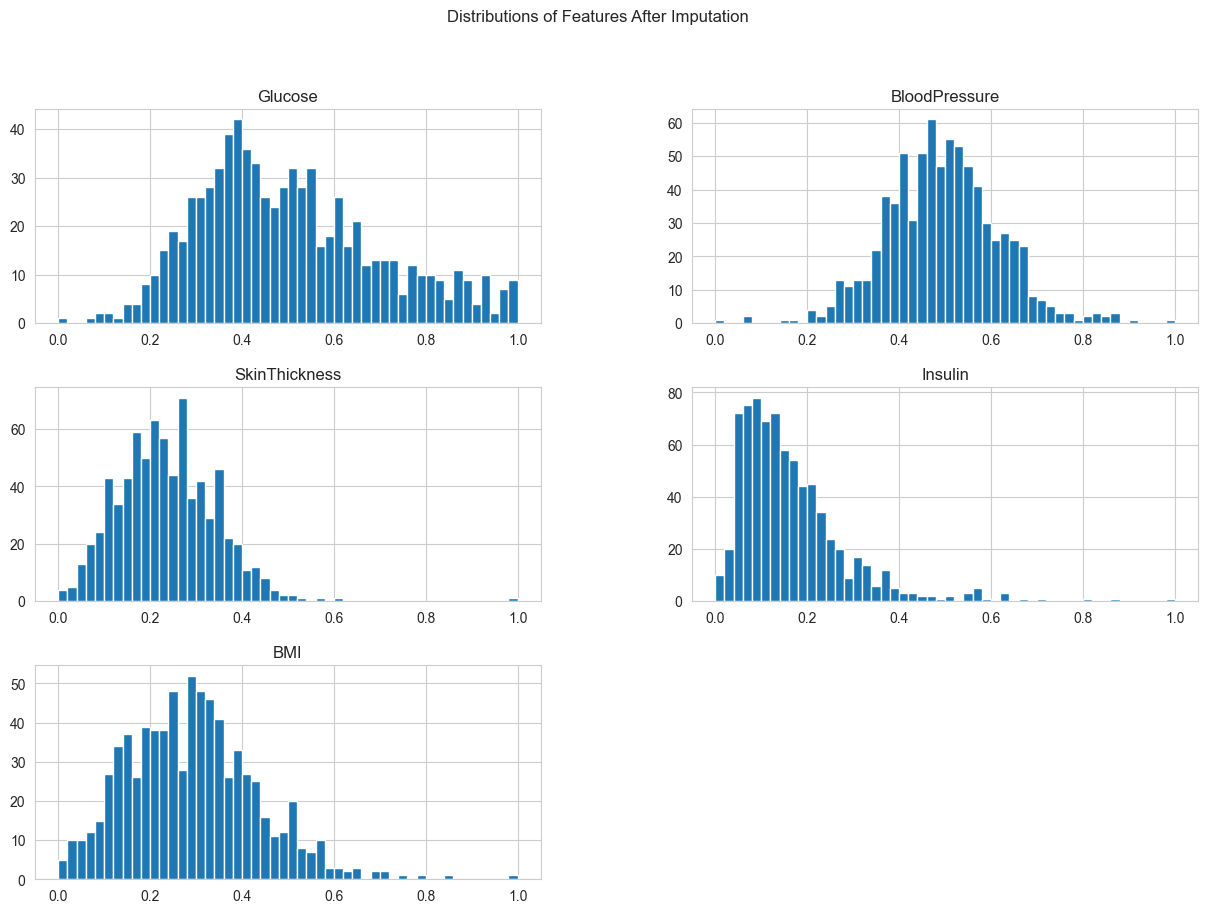

In [26]:
# Plot histograms to understand the distribution post-imputation
df[columns_with_zeros].hist(bins=50, figsize=(15, 10))
plt.suptitle('Distributions of Features After Imputation')
plt.show()

In [27]:
# Now you have a dataset with missing values handled, export this to a new CSV if required
df.to_csv('diabetes_imputed_advanced.csv', index=False)